In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [2]:
data = pd.read_csv("DatevsViews.csv")
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [3]:
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


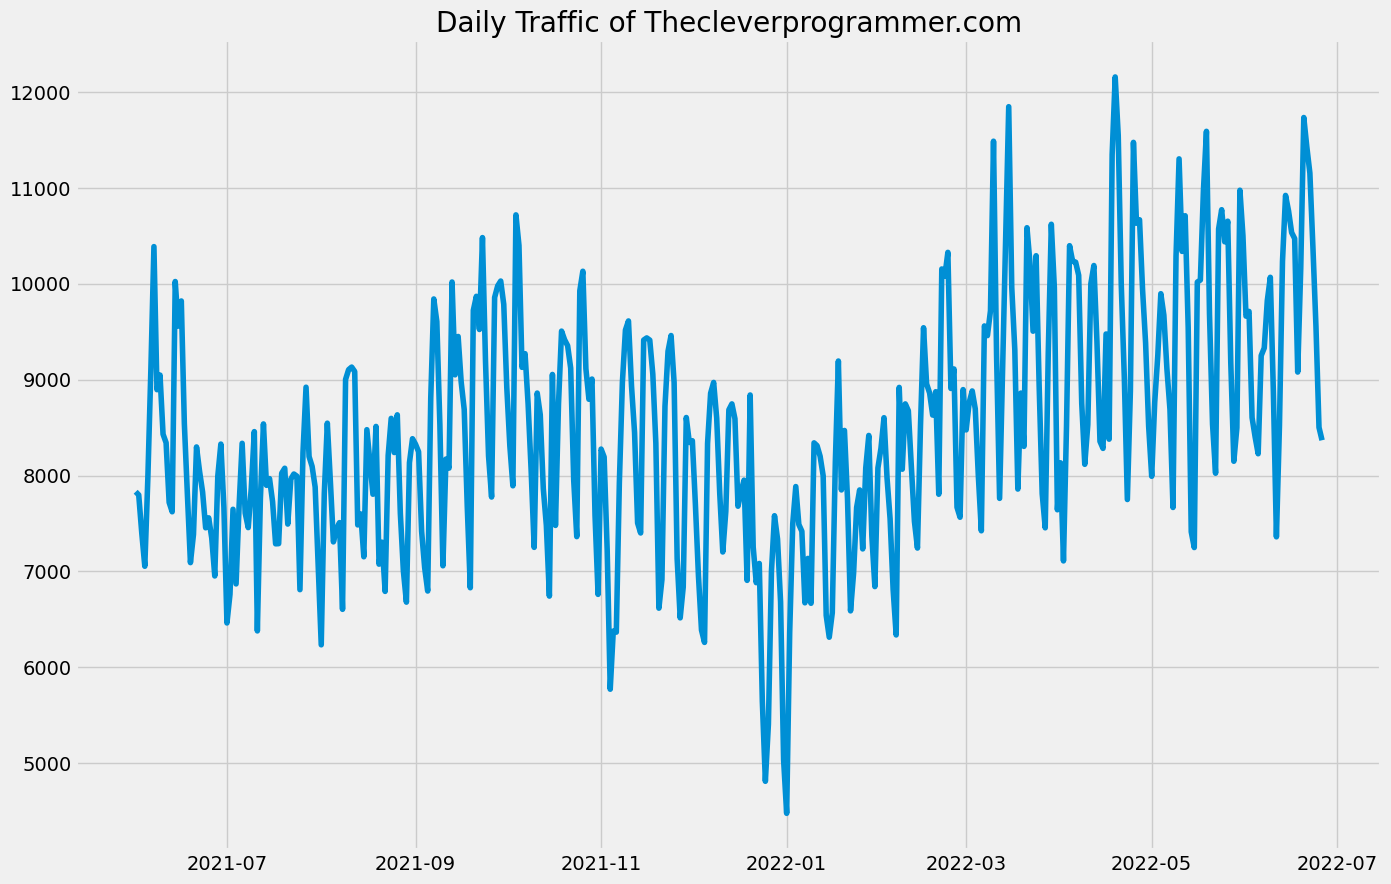

In [4]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

<Figure size 640x480 with 0 Axes>

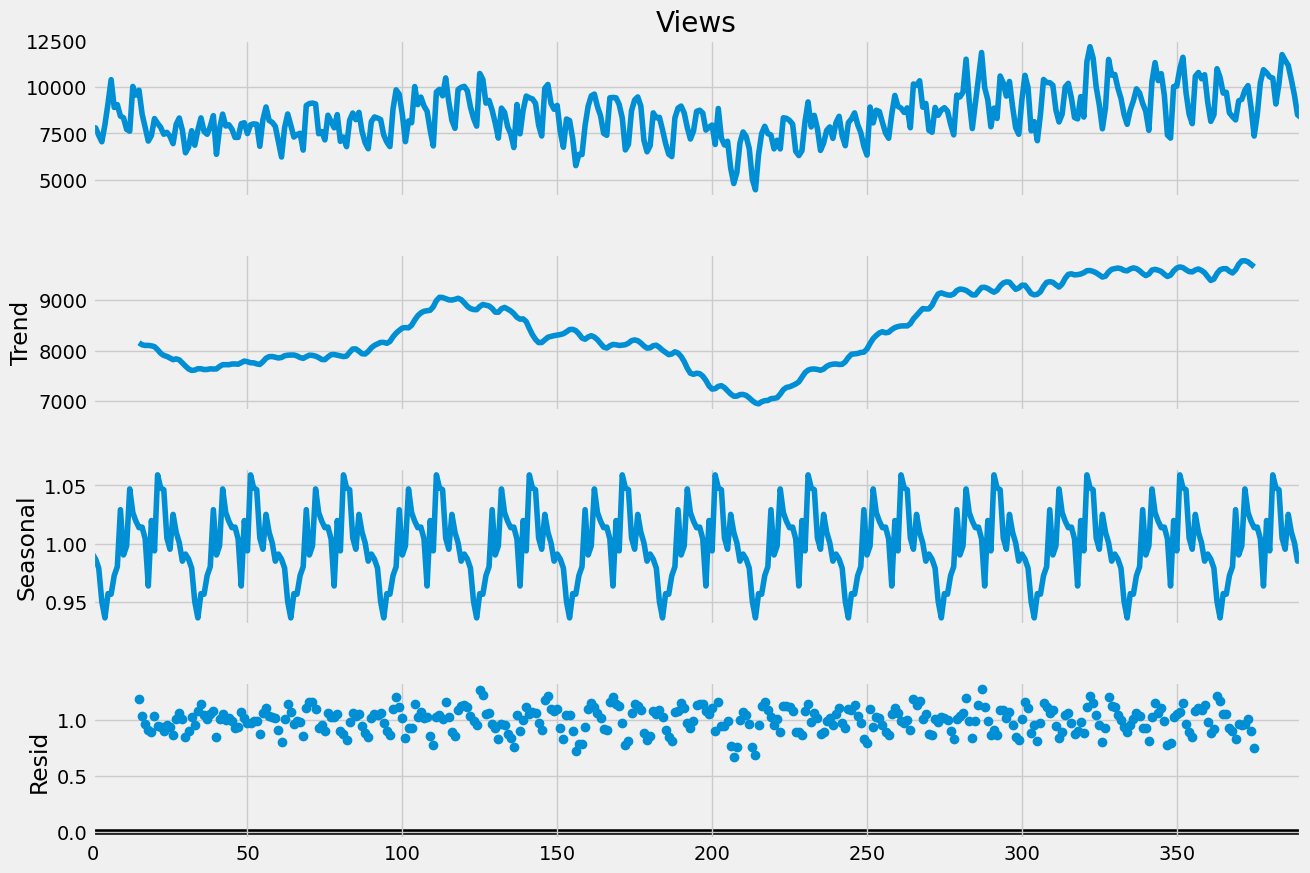

In [7]:
result = seasonal_decompose(data["Views"], 
                            model='multiplicative', 
                            period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

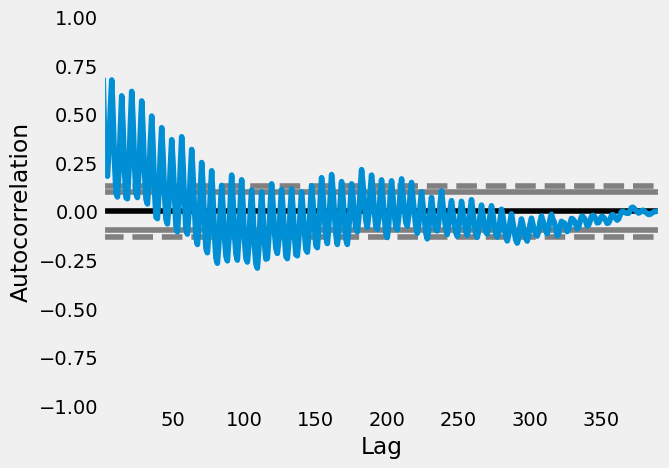

In [8]:
pd.plotting.autocorrelation_plot(data["Views"])

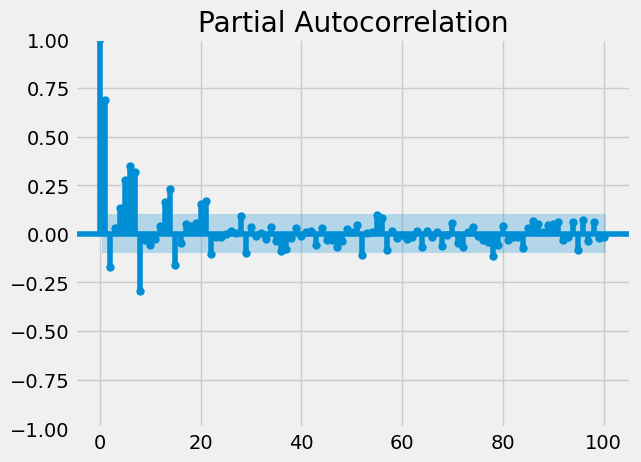

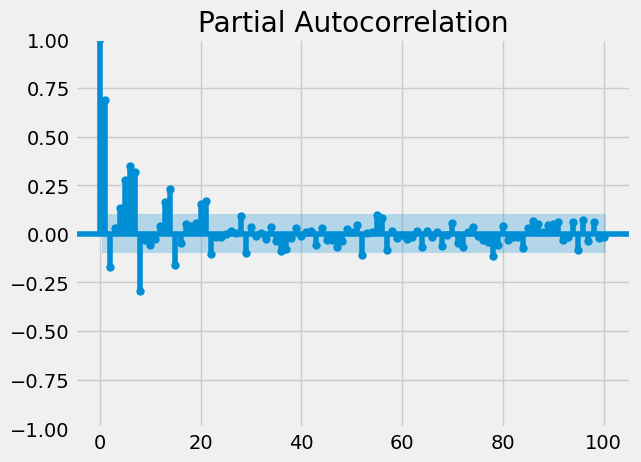

In [9]:
plot_pacf(data["Views"], lags = 100)

In [10]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\sudhanshu raj\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sudhanshu raj\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.452
Date:                            Fri, 12 Jul 2024   AIC                           6228.904
Time:                                    15:32:37   BIC                           6287.928
Sample:                                         0   HQIC                          6252.330
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7966      0.134      5.945      0.000       0.534       1.059
ar.L2         -0.7853      0.136   

In [11]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9862.546074
392    10767.513443
393    10725.382834
394     9834.201342
395     8752.713392
396     8198.354518
397     8904.172300
398     9678.084942
399    10269.987352
400    10589.376616
401     9772.301311
402     9309.643386
403     9016.076834
404     9056.967974
405    10527.459723
406    10982.920866
407    10823.910861
408    10004.262055
409     9396.504101
410     8594.491089
411     9138.662708
412    10396.330735
413    10583.486138
414    10756.775808
415    10213.688048
416     9405.273416
417     9039.170449
418     9165.810832
419     9904.550458
420    10230.589897
421    10680.472707
422     9848.351150
423     9510.460054
424     9050.566590
425     8780.177192
426    10100.575548
427    10809.120980
428    10861.572343
429    10344.368163
430     9382.769818
431     8621.978149
432     8664.595086
433    10030.184047
434    10470.785993
435    10782.444672
436    10430.370779
437     9270.252664
438     9134.037550
439     9329.290675
440    10281.198010


<Axes: >

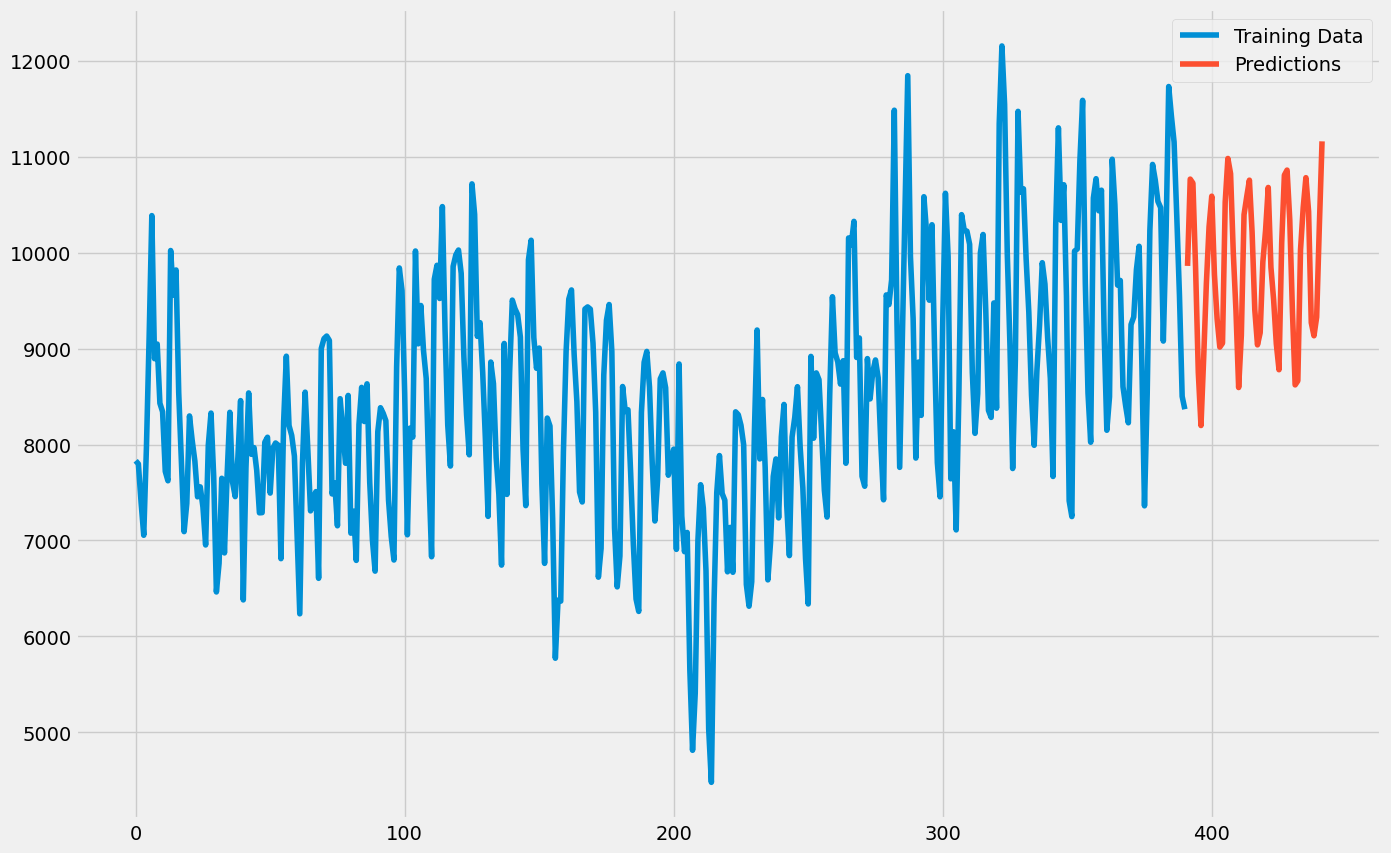

In [12]:
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")